In [ ]:
#!pip install prophet
import prophet

In [ ]:
import tvdatafeed as tv

#obj = ut.HistStockPrice()
obj = tv.TvDatafeed()
k = obj.get_hist(symbol='KCE',exchange='SET',interval=tv.Interval.in_daily,n_bars=252*3)
k = k[['open','high','low','close','volume']]
k.tail(5)

KCE SET None


open   high    low  close      volume
datetime                                                   
2023-09-11 02:00:00  50.00  51.00  49.50  50.25   6116590.0
2023-09-12 02:00:00  50.50  52.50  50.50  52.00  12697523.0
2023-09-13 02:00:00  51.50  52.75  51.25  51.50  10777767.0
2023-09-14 02:00:00  51.25  52.25  51.25  51.75   8290533.0
2023-09-15 02:00:00  52.25  52.50  51.00  51.50   4536992.0

In [ ]:
df = k[['close']]
df = df.reset_index()

In [ ]:
df.columns = ['ds','y']
#df

In [ ]:
#define the forecasting model parameters, trend = logistic growth, yearly seasonality = multiplicative, no holiday parameter
model_params = {"daily_seasonality": False,
                "weekly_seasonality": False,
                "yearly_seasonality": True,

                "growth": "linear"}

m = prophet.Prophet(growth='linear',yearly_seasonality=False,daily_seasonality=False)
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5wryispr/3lrqt0qc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5wryispr/ooalmqrb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12199', 'data', 'file=/tmp/tmp5wryispr/3lrqt0qc.json', 'init=/tmp/tmp5wryispr/ooalmqrb.json', 'output', 'file=/tmp/tmp5wryispr/prophet_model1isxkts_/prophet_model-20230917104544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:45:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(365, freq='D')
forecast = m.predict(future)

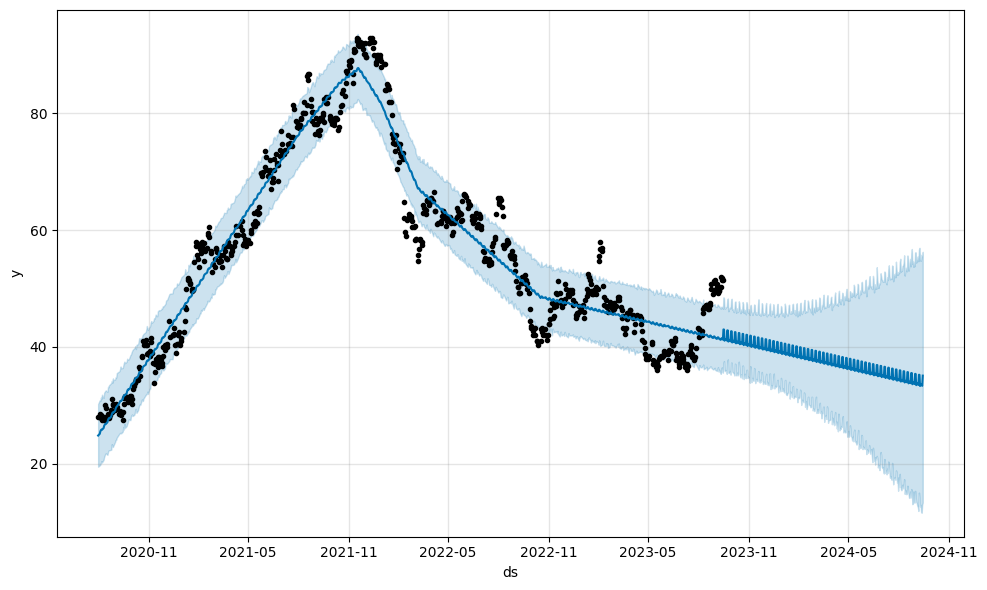

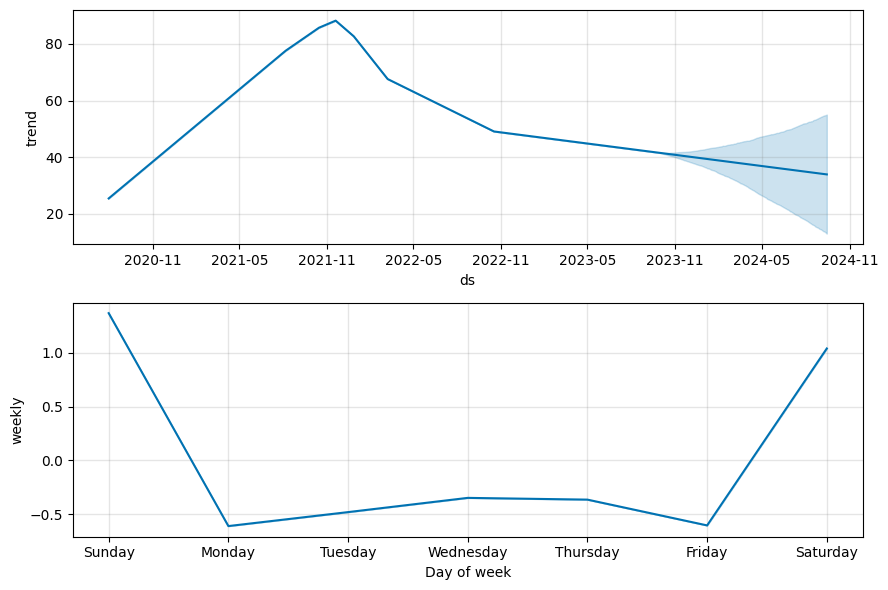

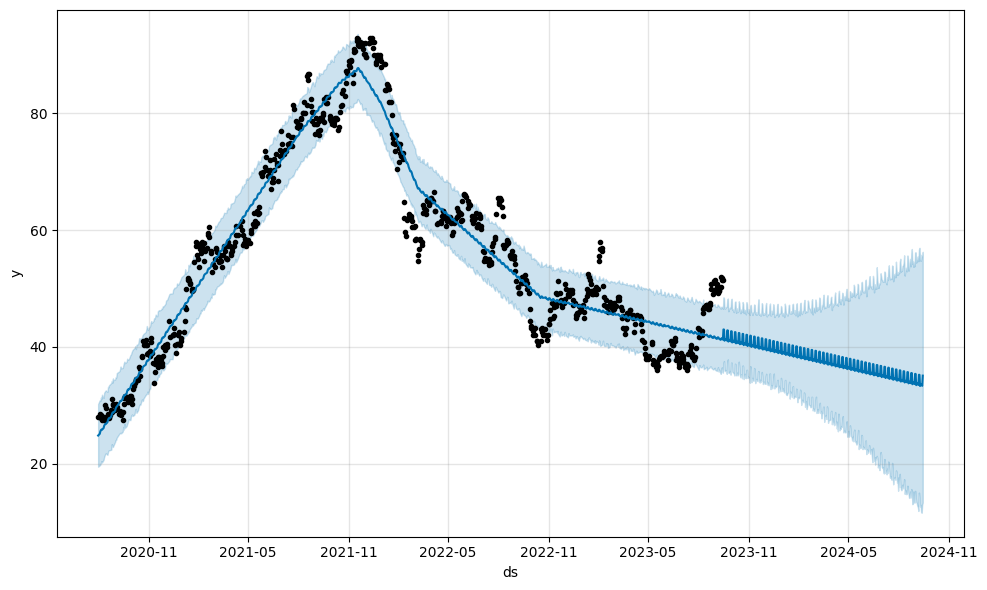

In [ ]:
m.plot_components(forecast)
m.plot(forecast)